# **Project Name - USA Regional Sales Analysis (EDA)**

## 🗂️ **Project Summary**

This EDA notebook provides an in-depth exploration of **Acme Co.’s 2014–2018 U.S. sales dataset**, covering data quality, trends, and customer insights to uncover key business patterns and opportunities.

#### 🔍 *Key Focus Areas:*

- **Data Profiling & Cleaning:**  
  Verified schema integrity, handled missing budget values, and standardized data types for accurate analysis.

- **Univariate & Bivariate Analysis:**  
  Explored revenue, profit margin, and unit price distributions; analyzed breakdowns by product, channel, and region.

- **Trend & Seasonality:**  
  Visualized monthly and yearly sales performance to highlight recurring peaks, dips, and seasonal trends.

- **Outlier Detection:**  
  Identified and examined extreme transactions on both ends of the revenue and unit-price ranges.

- **Correlation & Segmentation:**  
  Analyzed relationships among key metrics and segmented customers based on revenue versus profit margin.



💡 *This analysis serves as a foundation for improving sales strategy, optimizing profitability, and enhancing customer targeting.*

## ❓**Problem Statement**

Analyze Acme Co.’s 2014–2018 sales performance to pinpoint the key drivers of revenue and profitability across products, channels, and regions. Identify seasonality and outlier behavior, evaluate results against budget targets, and leverage these insights to optimize pricing strategies, promotional efforts, and market expansion initiatives—ultimately supporting sustainable growth while reducing customer and product concentration risk.

## 🎯 **Objective**

Deliver actionable insights from Acme Co.’s 2014–2018 sales dataset to:

✅ Identify top-performing **products**, **channels**, and **regions** driving revenue and profit  
✅ Detect **seasonal trends** and **anomalies** to improve demand planning  
✅ Spot **pricing** and **margin risks** stemming from outlier transactions  
✅ Inform **pricing**, **promotion**, and **market expansion** strategies  

These findings will guide the design of a **Power BI dashboard** that supports:
- Data-driven strategic decisions
- Improved forecasting accuracy
- Sustainable revenue growth

## 📥 **Setup & Configuration**

In [2]:
# 📘 1. IMPORT LIBRARIES

# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## 🔄 **Data Ingestion**

In [3]:
# 📂 2. LOAD DATA

# Path to Excel workbook
sheets = pd.read_excel(r"C:/Users/dey7s/OneDrive/Desktop/Coding/Projects/Data Analytics Projects/2) Sales Trends and Regional Insights - USA/Upload/Sales_Trends_and_Regional_Insights_USA.xlsx", sheet_name = None)
sheets

{'Sales Orders':         OrderNumber  OrderDate  Customer Name Index      Channel  \
 0       SO - 000225 2014-01-01                  126    Wholesale   
 1      SO - 0003378 2014-01-01                   96  Distributor   
 2      SO - 0005126 2014-01-01                    8    Wholesale   
 3      SO - 0005614 2014-01-01                   42       Export   
 4      SO - 0005781 2014-01-01                   73    Wholesale   
 ...             ...        ...                  ...          ...   
 64099  SO - 0007573 2018-02-28                   74    Wholesale   
 64100  SO - 0007706 2018-02-28                   51       Export   
 64101  SO - 0007718 2018-02-28                  136  Distributor   
 64102  SO - 0008084 2018-02-28                  158  Distributor   
 64103  SO - 0008654 2018-02-28                   22  Distributor   
 
       Currency Code Warehouse Code  Delivery Region Index  \
 0               USD         AXW291                    364   
 1               USD         A

In [4]:
# 🔍 2.1 ASSIGN TO NAMED DATAFRAMES

df_sales = sheets['Sales Orders']
df_customers = sheets['Customers']
df_regions = sheets['Regions']
df_state_reg = sheets['State Regions']
df_products = sheets['Products']
df_budgets = sheets['2017 Budgets']

## 🔍 **Data Profiling / Initial Inspection**

In [5]:
# 🔍 2.2 QUICK SHAPE OVERVIEW

print("df_sales shape: ", (df_sales.shape))
print("df_customers shape: ", (df_customers.shape))
print("df_regions shape: ", (df_regions.shape))
print("df_state_regions shape: ", (df_state_reg.shape))
print("df_products shape: ", (df_products.shape))
print("df_budgets shape: ", (df_budgets.shape))

df_sales shape:  (64104, 14)
df_customers shape:  (175, 2)
df_regions shape:  (994, 15)
df_state_regions shape:  (49, 3)
df_products shape:  (30, 2)
df_budgets shape:  (30, 2)


In [6]:
# 🔍 3. DATA EXPLORATION / OVERVIEW

# 3.1 Check the First few rows of each sheets

#  First few rows of Sales_Orders sheet

df_sales.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Column1,Column2
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,14994.6,10946.058
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,25868.7,13969.098
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,5869.2,4108.440
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,16368.1,7201.964
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,18331.2,10082.160


In [7]:
#  First few rows of Customers sheet

df_customers.head(5)

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [8]:
#  First few rows of Regions sheet

df_regions.head(5)

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [9]:
#  First few rows of State_Regions sheet

df_state_reg.head(5)

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


In [10]:
#  First few rows of Products sheet

df_products.head(5)

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


In [11]:
#  First few rows of 2017_Budgets sheet

df_budgets.head(5)

,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [12]:
# Take the first row of the df_state_reg DataFrame and store it as the new header

new_header = df_state_reg.iloc[0]           # grab the first row
df_state_reg.columns = new_header           # set columns
df_state_reg = df_state_reg[1:].reset_index(drop = True)         # drop header row and reset    

df_state_reg.head(5)

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [13]:
# Check for how many missing (NaN) values exist in each column of our each dataset.

df_sales.isnull().sum()

OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
Column1                      0
Column2                      0
dtype: int64

In [14]:
df_customers.isnull().sum()

Customer Index    0
Customer Names    0
dtype: int64

In [15]:
df_regions.isnull().sum()

id               0
name             0
county           0
state_code       0
state            0
type             0
latitude         0
longitude        0
area_code        0
population       0
households       0
median_income    0
land_area        0
water_area       0
time_zone        0
dtype: int64

In [16]:
df_state_reg.isnull().sum()

0
State Code    0
State         0
Region        0
dtype: int64

In [17]:
df_products.isnull().sum()

Index           0
Product Name    0
dtype: int64

In [18]:
df_budgets.isnull().sum()

Product Name    0
2017 Budgets    0
dtype: int64

In [19]:
# Checking for duplicate values

len(df_sales) == len(df_sales.drop_duplicates())

True

In [20]:
len(df_customers) == len(df_customers.drop_duplicates())

True

In [21]:
len(df_regions) == len(df_regions.drop_duplicates())

True

In [22]:
len(df_state_reg) == len(df_state_reg.drop_duplicates())

True

In [23]:
len(df_products) == len(df_products.drop_duplicates())

True

In [24]:
len(df_budgets) == len(df_budgets.drop_duplicates())

True

## 🧹 **Data Cleaning & Wrangling**

In [25]:
# 🔧 4. DATA WRANGLING & MERGING

# 4.1 Merge with Customers

"""
The new DataFrame df will contain:
- All columns from df_sales
- Plus any matching columns from df_customers (like customer name, region, segment, etc.)
- If a sale’s customer ID doesn’t exist in df_customers, those new fields will be NaN.
"""

df = df_sales.merge(
    df_customers,
    how = 'left',
    left_on = 'Customer Name Index',
    right_on = 'Customer Index'
)

df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Column1,Column2,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,14994.6,10946.058,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,25868.7,13969.098,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,5869.2,4108.440,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,16368.1,7201.964,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,18331.2,10082.160,73,Deseret Group


In [26]:
# 4.2 Merge with Products

df = df.merge(
    df_products,
    how = 'left',
    left_on = 'Product Description Index',
    right_on = 'Index'
)

df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Column1,Column2,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,14994.6,10946.058,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,25868.7,13969.098,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,5869.2,4108.440,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,16368.1,7201.964,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,18331.2,10082.160,73,Deseret Group,8,Product 8


In [27]:
# 4.3 Merge with Regions

df = df.merge(
    df_regions,
    how = 'left',
    left_on = 'Delivery Region Index',
    right_on = 'id'
)

df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [28]:
# 4.4 Merge with State Regions

df = df.merge(
    df_state_reg[["State Code", "Region"]],
    how='left',
    left_on='state_code',
    right_on='State Code'
)

df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,GA,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast


In [29]:
# 4.5 Merge with Budgets 2017

df = df.merge(
    df_budgets,
    how='left',
    on='Product Name'
)

df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,912,145674,52798,36466,268318796,13908113,America/New York,GA,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast,1085037.329


In [30]:
# Save the above cleaned or merged DataFrame df into a CSV file named 'merged_file.csv'.

df.to_csv('merged_file.csv')

In [31]:
# Cleanup redundant columns

cols_to_drop = ['Customer Index','Index', 'id', 'State Code']        # Remove any auto-generated cols you don't need
df = df.drop(columns = cols_to_drop, errors = 'ignore')

df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [32]:
# Convert all columns to lowercase (optional - Just for consistency and easier access)

df.columns = df.columns.str.lower()

# Display the updated list of column names

df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'column1', 'column2',
       'customer names', 'product name', 'name', 'county', 'state_code',
       'state', 'type', 'latitude', 'longitude', 'area_code',
       'population', 'households', 'median_income', 'land_area',
       'water_area', 'time_zone', 'region', '2017 budgets'], dtype=object)

In [33]:
# DROP UNNECESSARY COLUMNS & RENAME FOR CLARITY (with Region)
# ------------------------------------------------------------------

# 1) List only the columns we want to KEEP, now including the broader 'region'

cols_to_keep = [
    'ordernumber',          # unique order ID
    'orderdate',            # date when the order was placed
    'customer names',       # customer who placed the order
    'channel',              # sales channel (e.g., Wholesale, Distributor)
    'product name',         # product purchased
    'order quantity',       # number of units ordered
    'unit price',           # price per unit
    'line total',           # revenue for this line item (qty × unit_price)
    'total unit cost',      # company’s cost for this line item
    'state_code',           # two-letter state code
    'county',               # local government jurisdiction within a state
    'state',                # full state name
    'region',               # broader U.S. region (e.g., South, West)
    'latitude',             # latitude of delivery city
    'longitude',            # longitude of delivery city
    '2017 budgets'          # budget target for this product in 2017
]

# Subset the DataFrame to only these columns

df = df[cols_to_keep]

df.head(5)

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,line total,total unit cost,state_code,county,state,region,latitude,longitude,2017 budgets
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [34]:
# 2) Rename to more Pythonic / self-explanatory names, including region

df = df.rename(columns={
    'ordernumber': 'order_number',
    'orderdate': 'order_date',
    'customer names': 'customer_name',
    'product name': 'product_name',
    'order quantity': 'order_quantity',
    'unit price': 'unit_price',
    'line total': 'revenue',
    'total unit cost': 'total_unit_cost',
    'state_code': 'state',
    'state': 'state_name',
    'latitude': 'lat',
    'longitude': 'lon',
    '2017 budgets': 'budget'
})

# Display the cleaned DataFrame structure

df.head(1)

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total_unit_cost,state,county,state_name,region,lat,lon,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231


In [35]:
# Blank out budgets for non-2017 orders
# (as only 2017 budget data is provided)

df.loc[df['order_date'].dt.year != 2017, 'budget'] = pd.NA

# line total is revenue

df[['order_date', 'product_name', 'revenue', 'budget']].head(5)

,order_date,product_name,revenue,budget
0,2014-01-01,Product 27,14994.6,NaN
1,2014-01-01,Product 20,25868.7,NaN
2,2014-01-01,Product 26,5869.2,NaN
3,2014-01-01,Product 7,16368.1,NaN
4,2014-01-01,Product 8,18331.2,NaN


In [36]:
# line total is revenue

df[['order_date', 'product_name', 'revenue', 'budget']].tail(5)

,order_date,product_name,revenue,budget
64099,2018-02-28,Product 26,21788.4,NaN
64100,2018-02-28,Product 21,5185.8,NaN
64101,2018-02-28,Product 13,43483.0,NaN
64102,2018-02-28,Product 20,27717.9,NaN
64103,2018-02-28,Product 15,7986.4,NaN


In [37]:
# Check the whole dataframe

df

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total_unit_cost,state,county,state_name,region,lat,lon,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Dazzlesphe Corp,Wholesale,Product 26,12,1815.7,21788.4,980.478,PA,Bucks County,Pennsylvania,Northeast,40.15511,-74.82877,NaN
64100,SO - 0007706,2018-02-28,Yombu Corp,Export,Product 21,6,864.3,5185.8,579.081,IL,Cook County,Illinois,Midwest,42.11030,-88.03424,NaN
64101,SO - 0007718,2018-02-28,Bath Group,Distributor,Product 13,11,3953.0,43483.0,2648.510,FL,Broward County,Florida,South,26.24453,-80.20644,NaN
64102,SO - 0008084,2018-02-28,Linklinks Ltd,Distributor,Product 20,7,3959.7,27717.9,2930.178,NY,Erie County,New York,Northeast,42.91002,-78.74182,NaN


In [38]:
# Check the updated Dataset

df.to_csv('updated_dataset.csv')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_number     64104 non-null  object        
 1   order_date       64104 non-null  datetime64[ns]
 2   customer_name    64104 non-null  object        
 3   channel          64104 non-null  object        
 4   product_name     64104 non-null  object        
 5   order_quantity   64104 non-null  int64         
 6   unit_price       64104 non-null  float64       
 7   revenue          64104 non-null  float64       
 8   total_unit_cost  64104 non-null  float64       
 9   state            64104 non-null  object        
 10  county           64104 non-null  object        
 11  state_name       64104 non-null  object        
 12  region           64104 non-null  object        
 13  lat              64104 non-null  float64       
 14  lon              64104 non-null  float

In [40]:
# Filter the Dataset to include only records from the year 2017

df_2017 = df[df['order_date'].dt.year == 2017] 

In [41]:
# Check for missing values in each column of the dataset

df.isnull().sum()

order_number           0
order_date             0
customer_name          0
channel                0
product_name           0
order_quantity         0
unit_price             0
revenue                0
total_unit_cost        0
state                  0
county                 0
state_name             0
region                 0
lat                    0
lon                    0
budget             48841
dtype: int64

In [42]:
df_2017.head(5)

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total_unit_cost,state,county,state_name,region,lat,lon,budget
46363,SO - 0002544,2017-01-01,NCS Group,Wholesale,Product 30,6,1239.5,7437.0,1028.785,NJ,Hudson County,New Jersey,Northeast,40.77955,-74.02375,1011609.684
46364,SO - 0006431,2017-01-01,Epic Group,Wholesale,Product 13,5,1829.1,9145.5,1207.206,CO,Mesa County,Colorado,West,39.06387,-108.55065,3720639.645
46365,SO - 0007491,2017-01-01,State Ltd,Wholesale,Product 15,9,2412.0,21708.0,1664.280,CA,Los Angeles County,California,West,33.96168,-118.35313,3299478.315
46366,SO - 0008741,2017-01-01,Fivebridge Ltd,Wholesale,Product 8,8,904.5,7236.0,750.735,IA,Dubuque County,Iowa,Midwest,42.50056,-90.66457,1085037.329
46367,SO - 0009295,2017-01-01,Tagfeed Ltd,Wholesale,Product 2,12,1112.2,13346.4,811.906,FL,Hernando County,Florida,South,28.47689,-82.52546,3050087.565


## 🛠 **Feature Engineering**

In [43]:
### Feature Engineering (Introducing new Features)

df.head(5)

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total_unit_cost,state,county,state_name,region,lat,lon,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN


In [44]:
# 1. Calculate total cost for each line item

df['total_cost'] = df['order_quantity'] * df['total_unit_cost']

# 2. Calculate profit as revenue minus total_cost

df['profit'] = df['revenue'] - df['total_cost']

# 3. Calculate profit margin as a percentage

df['profit_margin_pct'] = df['profit'] * 100 / df['revenue']

# 4. Extract full month name from order_date for labeling (e.g., 'January', 'February')

df['order_month_name'] = df['order_date'].dt.month_name()

# 5. Extract month number from order_date for correct sorting (1–12)

df['order_month_num'] = df['order_date'].dt.month

# 6. Display the updated DataFrame

df

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total_unit_cost,state,...,state_name,region,lat,lon,budget,total_cost,profit,profit_margin_pct,order_month_name,order_month_num
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,...,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0,January,1
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,...,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0,January,1
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,...,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0,January,1
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,...,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0,January,1
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,...,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0,January,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Dazzlesphe Corp,Wholesale,Product 26,12,1815.7,21788.4,980.478,PA,...,Pennsylvania,Northeast,40.15511,-74.82877,NaN,11765.736,10022.664,46.0,February,2
64100,SO - 0007706,2018-02-28,Yombu Corp,Export,Product 21,6,864.3,5185.8,579.081,IL,...,Illinois,Midwest,42.11030,-88.03424,NaN,3474.486,1711.314,33.0,February,2
64101,SO - 0007718,2018-02-28,Bath Group,Distributor,Product 13,11,3953.0,43483.0,2648.510,FL,...,Florida,South,26.24453,-80.20644,NaN,29133.610,14349.390,33.0,February,2
64102,SO - 0008084,2018-02-28,Linklinks Ltd,Distributor,Product 20,7,3959.7,27717.9,2930.178,NY,...,New York,Northeast,42.91002,-78.74182,NaN,20511.246,7206.654,26.0,February,2


## 📊 **Exploratory Analysis**

In [45]:
# Check the updated Dataset

df.to_csv('updated_dataset.csv')

### 🔹 *1. Monthly Sales Trend Over Time*

- **Goal:** Track revenue trends over time to identify seasonality, growth patterns, and sales spikes.

- **Chart Type:** Line Chart

- **EDA Category:** Temporal (Time Series)

- **Visualization Structure:** Line with markers to highlight monthly revenue points for improved clarity and comparison.

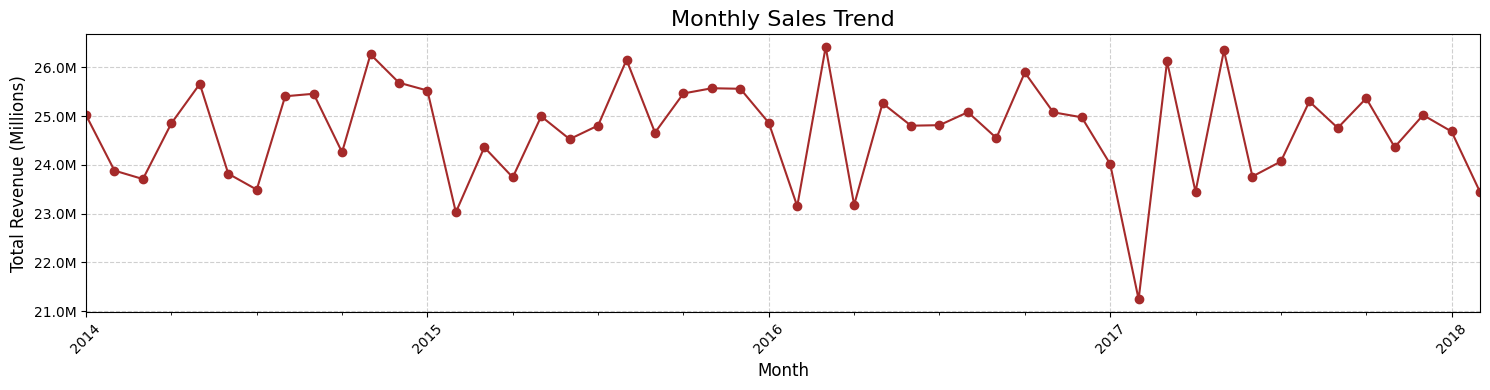

In [46]:
### EDA (Exploratory Data Analysis)

# Convert order_date to month period
df['order_month'] = df['order_date'].dt.to_period('M')

# Aggregate monthly revenue
monthly_sales = df.groupby('order_month')['revenue'].sum()

# Plot
plt.figure(figsize=(15, 4))
monthly_sales.plot(marker='o', color='brown')

# Format y-axis as millions
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

# Titles and labels
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue (Millions)', fontsize=12)
plt.xticks(rotation=45)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


#### 🔍 **INSIGHTS:**

- **Consistent Seasonal Pattern:** Sales cycle between **$24 M - $26 M**, with recurring peaks in **May–June** and troughs in **January**.
  
- **Stable Year-Over-Year Trend:** The revenue curve remains steady across the observed period, indicating predictable seasonal demand.
  
- **Notable Outlier:** An unexpected revenue drop in **early 2017** suggests a potential anomaly. This may warrant investigation into factors such as market disruptions, supply constraints, or poorly timed promotions.

### 🔹 *2. Total Monthly Sales Trend (Excluding Year 2018)*

- **Goal:** Reveal overall seasonality trends by aggregating sales for each calendar month across all years.
  
- **Chart Type:** Line chart
  
- **EDA Category:** Temporal (Time Series)
  
- **Structure:** Line plot with markers, ordered from **January → December** using month number for correct chronological sequencing.

In [47]:
# Ensure order_date is a datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Filter out January and February 2018
df_new = df[~((df['order_date'].dt.year == 2018) & (df['order_date'].dt.month.isin([1, 2])))]

C:\Users\dey7s\AppData\Local\Temp\ipykernel_21288\3700335552.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['order_date'] = pd.to_datetime(df_new['order_date'])
C:\Users\dey7s\AppData\Local\Temp\ipykernel_21288\3700335552.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['month_num'] = df_new['order_date'].dt.month
C:\Users\dey7s\AppData\Local\Temp\ipykernel_21288\3700335552.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

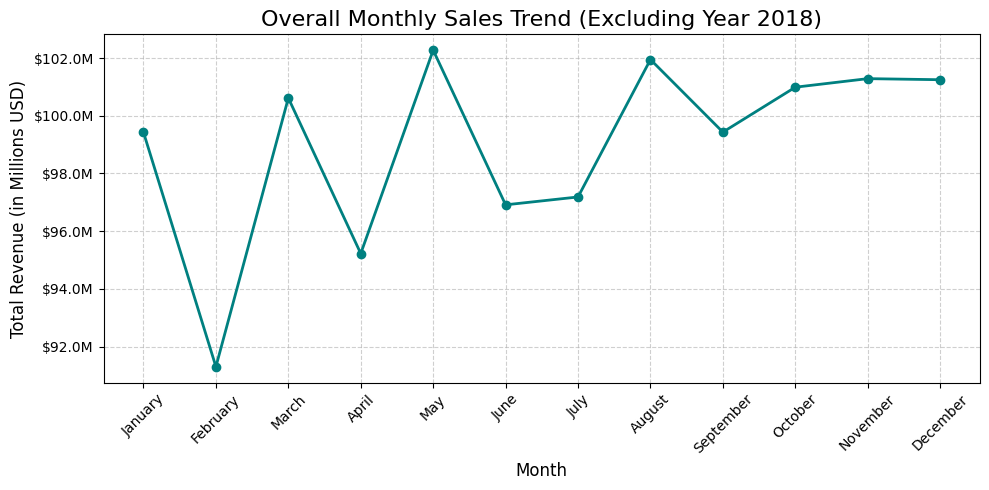

In [48]:
from matplotlib.ticker import FuncFormatter

# Ensure order_date is datetime
df_new['order_date'] = pd.to_datetime(df_new['order_date'])

# Extract month number and month name
df_new['month_num'] = df_new['order_date'].dt.month
df_new['month_name'] = df_new['order_date'].dt.month_name()

# Group by calendar month (across all years) and sum the revenue
monthly_seasonality = (
    df_new.groupby(['month_num', 'month_name'])['revenue']
      .sum()
      .reset_index()
      .sort_values('month_num')
)

# Plot the trend
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_seasonality['month_name'],
    monthly_seasonality['revenue'],
    marker='o',
    linewidth=2,
    color='teal'
)

# Format y-axis in millions
formatter = FuncFormatter(lambda x, pos: f'${x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

# Style the plot
plt.title('Overall Monthly Sales Trend (Excluding Year 2018)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue (in Millions USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


#### 🔍 **INSIGHTS:**

- **January** starts strong at approximately **99M** in revenue.
  
- A **steady decline** follows through **April**, reaching the annual low of around **95M**.

- Sales **rebound** in **May** and **August**, climbing to roughly **102M**.
  
- From **September to December**, revenue stabilizes into a **99M–101M plateau**.

**Overall Pattern:**  
A recurring cycle featuring a **post–New Year surge**, a **spring dip**, and a **mid-summer bump** consistently appears across all calendar years.

### 🔹 *3. Top 10 Products by Revenue (in Millions)*

- **Goal:** Identify the **highest-grossing products** to prioritize marketing, inventory planning, and sales strategy efforts.

- **Chart Type:** Bar Chart

- **EDA Type:** Univariate Analysis

- **Structure:**

      - Bars are sorted in descending order to display the Top 10 products.

      - Revenue values are scaled in millions (USD) for clarity and comparison.

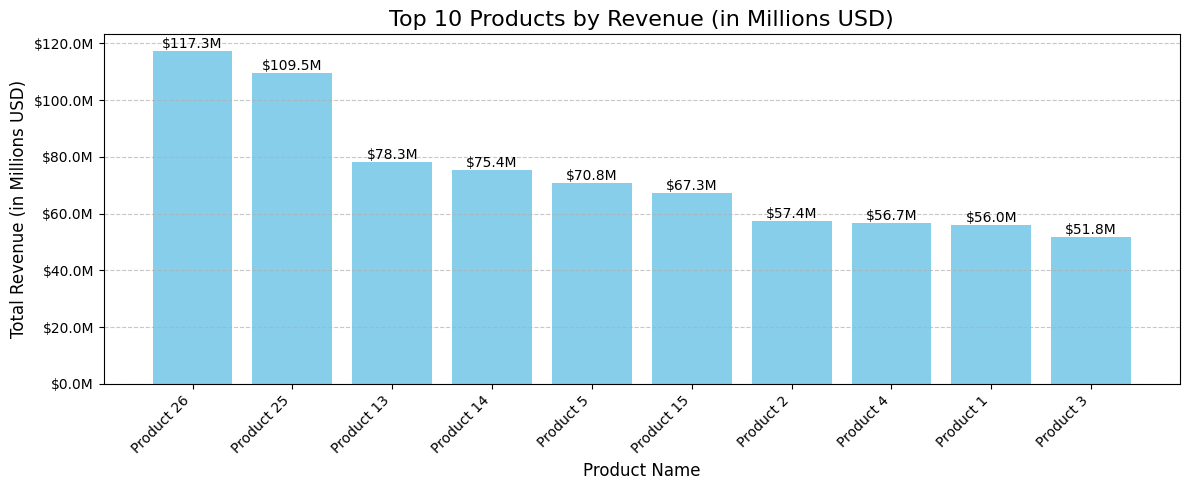

In [49]:
# Ensure revenue is numeric (in case)
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')

# Group by product and sum revenue
product_revenue = df.groupby('product_name')['revenue'].sum().reset_index()

# Get top 10 products by revenue
top_products = product_revenue.sort_values(by='revenue', ascending=False).head(10)

# Plot bar chart
plt.figure(figsize=(12, 5))
bars = plt.bar(top_products['product_name'], top_products['revenue'], color='skyblue')

# Format y-axis in millions
formatter = FuncFormatter(lambda x, pos: f'${x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

# Add labels on each bar (in millions)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'${height/1e6:.1f}M',      # label also in millions
        ha='center',
        va='bottom',
        fontsize=10
    )

# Add titles, labels, and grid
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Total Revenue (in Millions USD)', fontsize=12)
plt.title('Top 10 Products by Revenue (in Millions USD)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


#### 🔍 **INSIGHTS:**

- **Products 26 and 25** lead significantly with revenues of **117M** and **109M**, respectively.  
    
- A sharp decline follows, with **Product 13** at **78M**, and a mid-tier cluster ranging between **67–78M**.  
    
- The **bottom four products** group tightly around **52M–57M**, suggesting consistent but limited performance.  

### 🔹 *4. Bottom 10 Products by Revenue (in Millions)*

- **Goal:** Identify the **lowest-performing products by revenue** to uncover potential areas for improvement in product strategy and sales focus.

- **Chart Type:** Bar chart

- **EDA Category:** Univariate Analysis

- **Structure:** Bars sorted in **ascending order** to display the **bottom 10 products by total revenue (in millions USD)**, highlighting products with the lowest sales performance for targeted optimization.

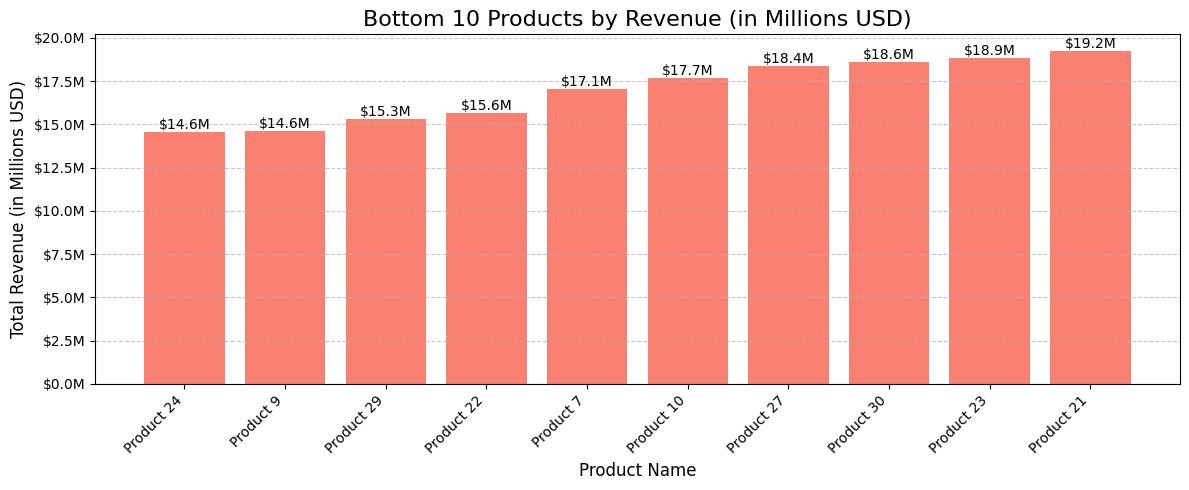

In [50]:
# Ensure revenue is numeric (in case)
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')

# Group by product and sum revenue
product_revenue = df.groupby('product_name')['revenue'].sum().reset_index()

# Get bottom 10 products by revenue
bottom_products = product_revenue.sort_values(by='revenue', ascending=True).head(10)

# Plot bar chart
plt.figure(figsize=(12, 5))
bars = plt.bar(bottom_products['product_name'], bottom_products['revenue'], color='salmon')

# Format y-axis in millions
formatter = FuncFormatter(lambda x, pos: f'${x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

# Add labels on each bar (in millions)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'${height/1e6:.1f}M',      # label also in millions
        ha='center',
        va='bottom',
        fontsize=10
    )

# Add titles, labels, and grid
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Total Revenue (in Millions USD)', fontsize=12)
plt.title('Bottom 10 Products by Revenue (in Millions USD)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


#### 🔍 **INSIGHTS:**

- Products **24** and **9** record the **lowest revenues**, both around **14.6M**, marking the weakest performers.
  
- A gradual rise is observed among **Products 29** and **22**, reaching approximately **15M–16M**.

- Mid-tier performers such as **Products 7** and **10** achieve revenues around **17M–18M**, indicating moderate but stable sales.

- The top of this bottom group — **Products 27, 30, 23, and 21** — cluster between **18M–19M**, showing slightly stronger performance yet still trailing significantly behind higher-revenue products.

- Overall, the **revenue gap across the bottom 10** remains narrow **(≈ 14M–19M)**, suggesting uniformly low contribution and potential candidates for product rationalization or marketing support.  

### 🔹 *5. Total Sales by Channel*

- **Goal:** Show the **distribution of total sales across different channels** to identify the **most dominant sales routes**.

- **Chart Type:** Pie Chart

- **EDA Category:** Univariate Analysis

- **Structure:** Pie segments labeled with **percentages**, distinct **colors for clarity**, and an **adjusted start angle** for visual balance.


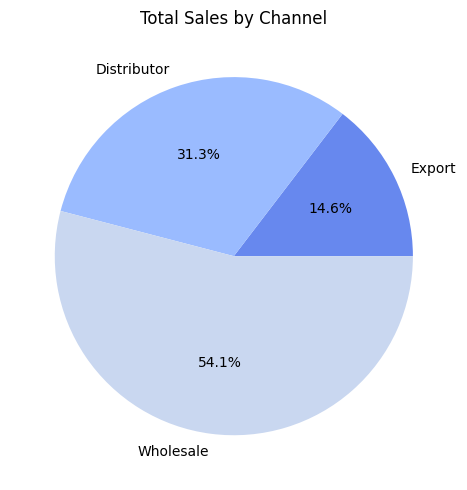

In [51]:
# TOTAL SALES BY CHANNEL

chan_sales = df.groupby('channel')['revenue'].sum().sort_values(ascending=True)

plt.figure(figsize=(5,5))

plt.pie(
    chan_sales.values,
    labels=chan_sales.index,
    autopct='%1.1f%%',
    colors=sns.color_palette('coolwarm')
)

plt.title('Total Sales by Channel')

plt.tight_layout()

plt.show()


#### 🔍 **INSIGHTS:**  

- **Wholesale** dominates with **54%** of total sales, followed by **Distributors (~31%)** and **Exports (~15%)**, highlighting a strong dependence on domestic bulk channels.
  
- To **reduce concentration risk** and **diversify revenue streams**, focus on **expanding export operations** through targeted **international marketing** and **strategic partnerships**.


### 🔹 *6. Top 10 Products by Avg Profit Margin (USD)*

- **Goal:**  Compare **average profitability across products** to pinpoint **high-margin performers** driving profitability.  

- **Chart Type:**  Horizontal Bar Chart

- **EDA Category:**  Univariate Analysis

- **Structure:**  Bars are **sorted in ascending order** to display the **top 10 products** ranked by their **average profit margin (USD)**.


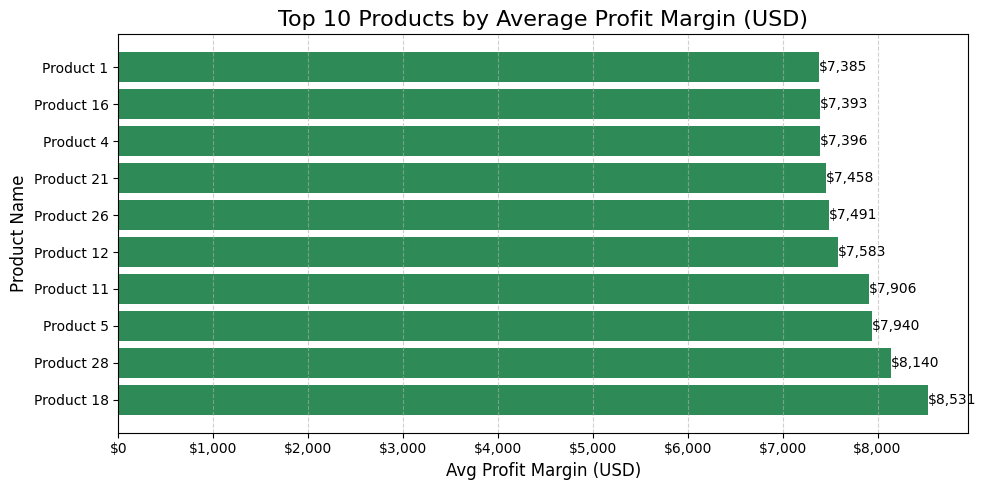

In [52]:
# Ensure profit is numeric (in case)
df['profit'] = pd.to_numeric(df['profit'], errors='coerce')

# Group by product and calculate average profit (USD)
product_avg_profit = (
    df.groupby('product_name')['profit']
      .mean()
      .reset_index()
)

# Get top 10 products by average profit
top_products_avg_profit = product_avg_profit.sort_values(by='profit', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 5))
bars = plt.barh(top_products_avg_profit['product_name'], top_products_avg_profit['profit'], color='#2E8B57')

# Format x-axis in millions (optional)
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'${x/1e6:.1f}M' if x >= 1e6 else f'${x:,.0f}')
plt.gca().xaxis.set_major_formatter(formatter)

# Add labels on bars
for bar in bars:
    width = bar.get_width()
    plt.text(
        width,
        bar.get_y() + bar.get_height()/2,
        f'${width:,.0f}',        # show in USD
        ha='left',
        va='center',
        fontsize=10
    )

# Add titles, labels, and grid
plt.title('Top 10 Products by Average Profit Margin (USD)', fontsize=16)
plt.xlabel('Avg Profit Margin (USD)', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#### 🔍 **INSIGHTS:**  

- **Products 18 and 28** lead with average profit margins of approximately **8.1–8.5K USD**, followed closely by **Products 5 and 11** around **7.9K USD**.
  
- **Mid-tier performers** such as **Products 12, 26, and 21** cluster within the **7.4–7.5K USD** range.

- The **bottom tier** — **Products 4, 16, and 1** — show lower margins around **7.3K USD**.  

💡 **Recommendation:**  
Analyze cost structures and pricing strategies of the **top-margin products** to replicate success and **improve overall product profitability**.

### 🔹 *7. Average Order Value (AOV) Distribution*

- **Goal:**  Understand the **distribution of order values** to identify **typical customer spending levels** and detect **potential outliers**.

- **Chart Type:**  Histogram

- **EDA Category:**  Univariate

- **Structure:**

    - **50 bins** representing order value ranges  
    - **Colored bars** with contrasting **edge highlights** for clear visibility  
    - Shows the **frequency distribution** of order values across all transactions


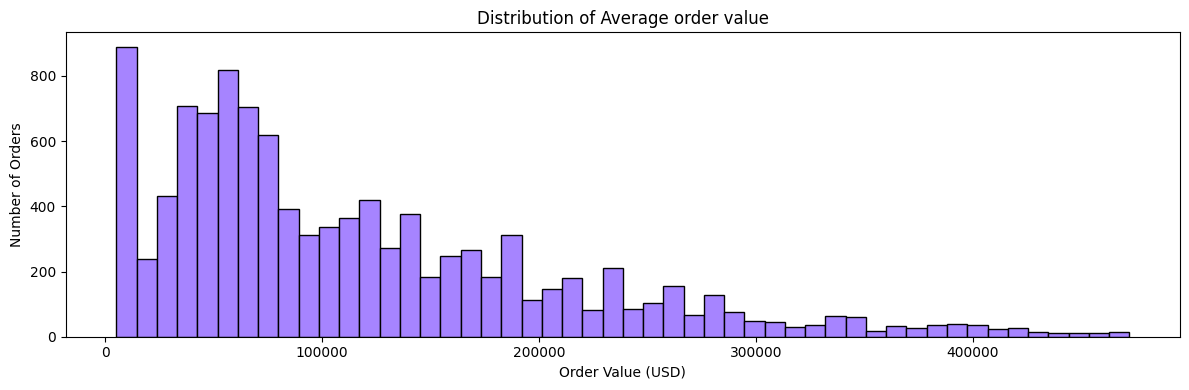

In [53]:
## Average Order Value (AOV) Distribution

aov = df.groupby('order_number')['revenue'].sum()

plt.figure(figsize=(12,4))

plt.hist(
    aov,
    bins=50,
    color='#A684FF',
    edgecolor='black'
)

plt.title('Distribution of Average order value')
plt.xlabel('Order Value (USD)')
plt.ylabel('Number of Orders')

plt.tight_layout()

plt.show()


#### 🔍 **INSIGHTS:**  

- The **order value distribution** is **right-skewed**, indicating that most orders fall within the **20K–120K** range.
  
- A distinct **mode** is observed around **50K–60K**, representing the most common order size.
  
- A **long tail** stretches toward **400K–500K**, reflecting a small number of **high-value transactions** that, while infrequent, contribute significantly to total revenue.

- This suggests a **concentrated mid-range demand** with occasional large orders driving top-line spikes.

### 🔹 *8. Profit Margin % vs. Unit Price*

- **Goal:**  Examine the **relationship between unit price and profit margin (%)** across all orders to understand pricing efficiency and margin behavior.  

- **Chart Type:**  Scatter Plot

- **EDA Category:**  Bivariate Analysis

- **Structure:**

    - Scatter points plotted for each order  
    - Transparency (`alpha`) applied to highlight **data density**  
    - Axes represent **Unit Price ($)** and **Profit Margin (%)**  
    - Used to detect potential **correlations or margin inefficiencies** at different pricing levels  


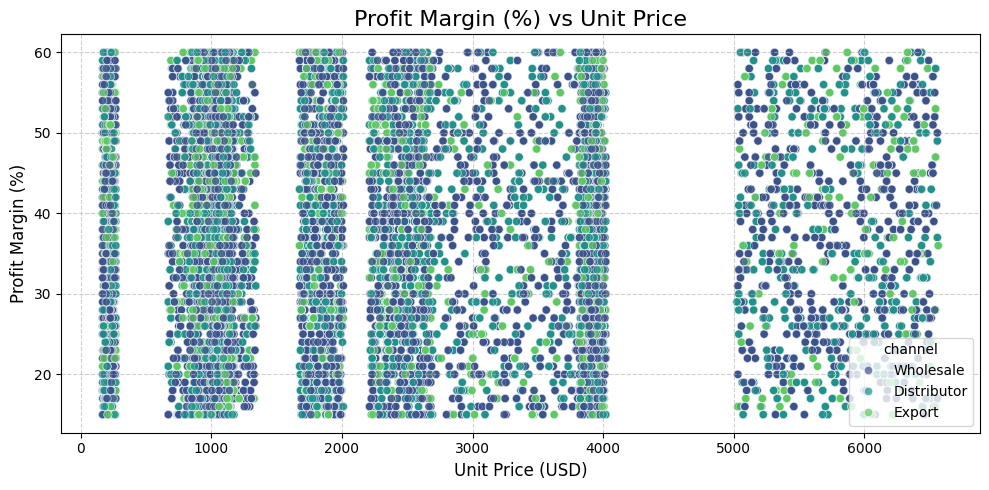

In [54]:
# Ensure numeric types
df['unit_price'] = pd.to_numeric(df['unit_price'], errors='coerce')
df['profit_margin_pct'] = pd.to_numeric(df['profit_margin_pct'], errors='coerce')

# Plot scatter chart
plt.figure(figsize=(10, 5))
sns.scatterplot(
    data=df,
    x='unit_price',
    y='profit_margin_pct',
    hue='channel',       # optional: color points by sales channel for more insight
    palette='viridis',
    alpha=0.7
)

# Add titles and labels
plt.title('Profit Margin (%) vs Unit Price', fontsize=16)
plt.xlabel('Unit Price (USD)', fontsize=12)
plt.ylabel('Profit Margin (%)', fontsize=12)

# Optional grid and layout
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#### 🔍 **INSIGHTS:**  

- **Profit margins** cluster between **~18% and 60%**, showing **no strong correlation** with unit price, which ranges from near **0 to 6,500 (USD)**.
  
- Dense **horizontal bands** suggest stable margin tiers across a wide range of prices, indicating **consistent pricing strategies**.

- **Outliers below 18%**—present at both low and high price levels—may point to **cost inefficiencies or pricing anomalies** that warrant further analysis.  

### 🔹 *9. Unit Price Distribution per Product*

- **Goal:**  Compare **pricing variability** across different products to identify **price consistency** and potential **outliers**.

- **Chart Type:**  Boxplot

- **EDA Category:**  Bivariate Analysis

- **Structure:**  Boxplot showing **unit price distribution per product**, with **rotated x-axis labels** for readability and clear visualization of **price spread and outliers**.  

C:\Users\dey7s\AppData\Local\Temp\ipykernel_21288\1919189084.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


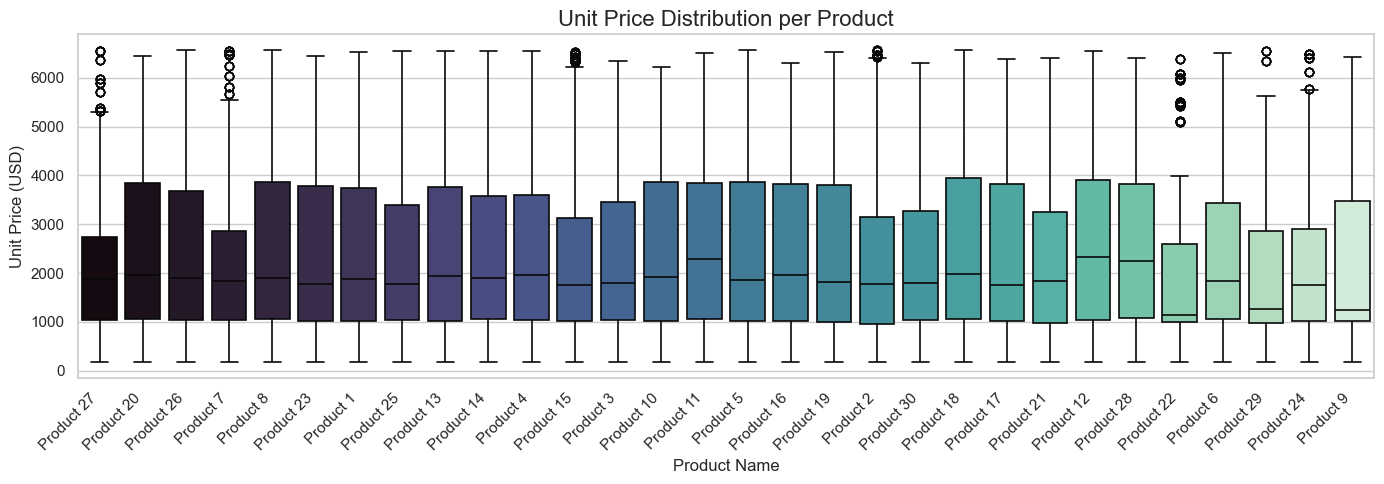

In [55]:
# Ensure numeric
df['unit_price'] = pd.to_numeric(df['unit_price'], errors='coerce')

# Set Seaborn style
sns.set(style='whitegrid')

# Plot boxplot for unit price distribution per product
plt.figure(figsize=(14, 5))
sns.boxplot(
    data=df,
    x='product_name',
    y='unit_price',
    palette='mako',     # or try 'viridis', 'crest', 'Spectral'
    showfliers=True,    # display outliers
    linewidth=1.2
)

# Titles and labels
plt.title('Unit Price Distribution per Product', fontsize=16)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Unit Price (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


#### 🔍 **INSIGHTS:** 

- Products **20**, **27**, and **28** exhibit **high-end outliers** in unit price, surpassing their upper whiskers — suggesting **premium versions**, **bulk order deals**, or **special product variants** driving temporary price spikes.  

- Several products (e.g., **20**, **27**, **26**) show **low-end outliers near zero**, possibly representing **discounted promotions**, **trial SKUs**, or **clearance transactions** that distort average pricing.  

- The **interquartile ranges (IQRs)** across most products remain fairly consistent, indicating **stable pricing strategies** overall, though variance exists among a few mid-tier products (e.g., **13**, **18**, **25**).  

- To improve pricing precision, **exclude extreme outlier transactions** from margin and profitability analyses.  

- **Recommendation:** Investigate whether the identified anomalies stem from **intentional marketing tactics** (e.g., promotions) or **data irregularities**, and determine if such pricing behavior should be **standardized or discontinued** to maintain price stability.  

### 🔹 *10. Total Sales by State (Choropleth Map)*

- **Goal:**  Visualize the **geographic distribution of sales** to identify **high- and low-performing states** and uncover **regional sales gaps**.

- **Chart Type:**  US Choropleth Map

- **EDA Category:**  Univariate Geospatial

- **Structure:**  
    - States are **shaded by total sales** (in **millions USD**) using a **blue gradient**.  
    - A **legend on the right** indicates the **sales scale (M USD)**.  
    - **Hover tooltips** display exact sales values for each state.  
    - The **map is scoped to the USA** to provide clear regional context and comparison.


In [56]:
# Ensure revenue is numeric
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')

# Clean state codes (2-letter)
df['state'] = df['state'].str.upper().str.strip()

# Aggregate total sales by state
state_sales = df.groupby('state', as_index=False)['revenue'].sum()

# Convert revenue to millions for better readability
state_sales['revenue_million'] = state_sales['revenue'] / 1e6

# Create choropleth map
fig = px.choropleth(
    state_sales,
    locations='state',                   # 2-letter state codes
    locationmode='USA-states',
    color='revenue_million',             # revenue in millions
    color_continuous_scale='Viridis',
    scope='usa',
    labels={'revenue_million':'Total Sales (Million USD)'},
    title='Total Sales by State (in Millions USD)'
)

# Increase map size and format layout
fig.update_layout(
    width=1000,      # increase width
    height=600,      # increase height
    title_x=0.5,
    geo=dict(bgcolor='rgba(0,0,0,0)'),
    coloraxis_colorbar=dict(
        title='Total Sales (M USD)',
        ticks='outside',
        tickprefix='$'
    )
)

fig.show()


#### 🔍 **INSIGHTS:**  

- **California** dominates with **228M**, followed by **Illinois (111M)** and **Florida (90M)** — forming a **top-tier cluster (> 90M)**.
    
- **Mid-tier states** such as **Texas (84M)** and **New York (55M)** show consistent performance but lag the leaders by **40M–145M**.

- **Lower-tier states** — from **New Jersey (47M)** down to **Massachusetts (35M)** — indicate **uneven market penetration**.  

##### 🚀 **Actionable Takeaways:**  

- **Reinforce** growth in top-performing states through **tailored promotions and strategic partnerships**.  
- **Expand** market presence in **under-penetrated regions** via **localized campaigns** and **channel diversification** to close performance gaps.

### 🔹 *11. Top 10 States by Revenue and Order Count*

- **Goal:**  Identify the **highest revenue-generating states** and compare them with their **order volumes** to assess sales concentration and regional performance alignment.  

- **Chart Type:**  Two **horizontal bar charts**  

- **EDA Category:**  Multivariate  

- **Structure:**

    - **Chart 1:** Top 10 states by **total revenue** (in millions USD)  
    - **Chart 2:** Top 10 states by **number of orders**  
    - Bars sorted in descending order for easy comparison  
    - Consistent color palette and shared axis formatting for visual alignment  


C:\Users\dey7s\AppData\Local\Temp\ipykernel_21288\1101791726.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\dey7s\AppData\Local\Temp\ipykernel_21288\1101791726.py:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




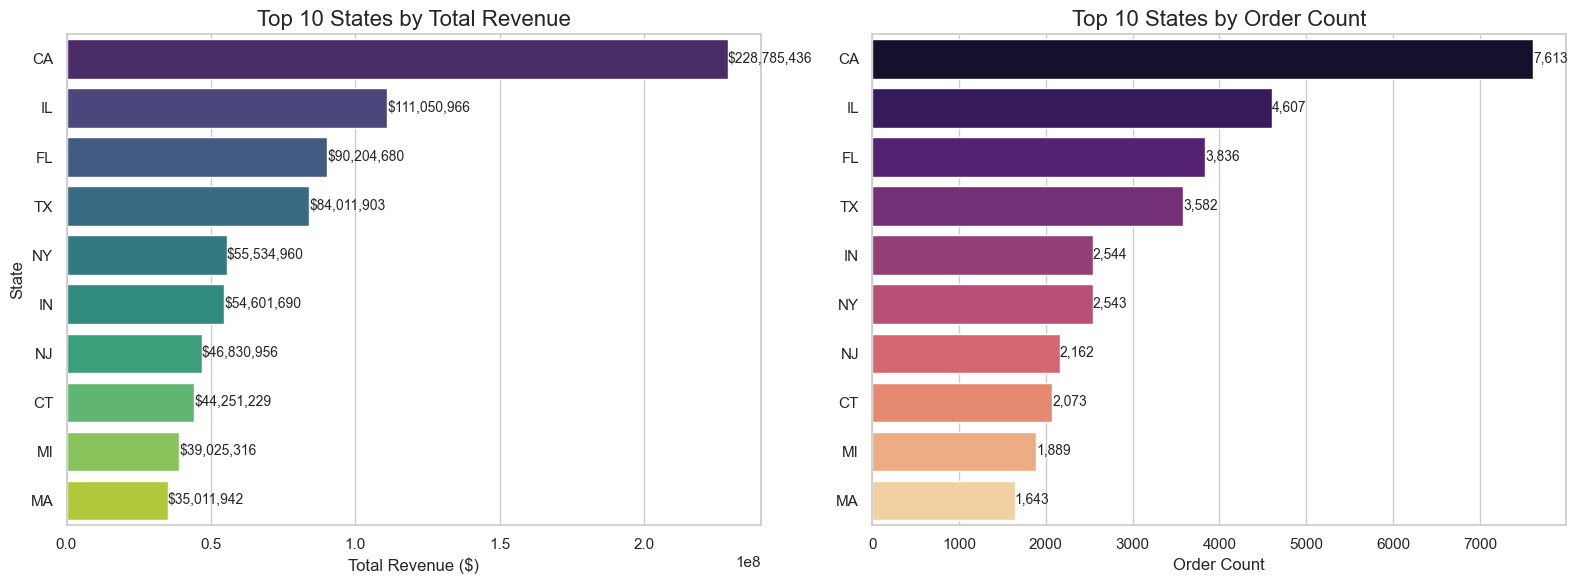

In [57]:
# Ensure numeric values
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')

# ---- Step 1: Aggregate metrics per state ----
state_summary = (
    df.groupby('state')
    .agg(
        total_revenue=('revenue', 'sum'),
        order_count=('order_number', 'nunique')
    )
    .reset_index()
)

# ---- Step 2: Get top 10 by revenue and top 10 by order count ----
top_revenue_states = state_summary.nlargest(10, 'total_revenue')
top_order_states = state_summary.nlargest(10, 'order_count')

# ---- Step 3: Plot side-by-side charts ----
sns.set(style='whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Left chart: Top 10 by Revenue ---
sns.barplot(
    data=top_revenue_states,
    x='total_revenue',
    y='state',
    palette='viridis',
    ax=axes[0]
)
axes[0].set_title('Top 10 States by Total Revenue', fontsize=16)
axes[0].set_xlabel('Total Revenue ($)')
axes[0].set_ylabel('State')

# Add value labels on bars
for i, v in enumerate(top_revenue_states['total_revenue']):
    axes[0].text(v, i, f'${v:,.0f}', va='center', ha='left', fontsize=10)

# --- Right chart: Top 10 by Order Count ---
sns.barplot(
    data=top_order_states,
    x='order_count',
    y='state',
    palette='magma',
    ax=axes[1]
)
axes[1].set_title('Top 10 States by Order Count', fontsize=16)
axes[1].set_xlabel('Order Count')
axes[1].set_ylabel('')

# Add value labels on bars
for i, v in enumerate(top_order_states['order_count']):
    axes[1].text(v, i, f'{v:,}', va='center', ha='left', fontsize=10)

# ---- Step 4: Final layout adjustments ----
plt.tight_layout()
plt.show()


#### 🔍 **INSIGHTS:** 

- **California (CA)** clearly leads with **$228.8M revenue** and **7,613 orders**, establishing it as the company’s **most dominant and high-volume market**.  

- **Illinois (IL)** and **Florida (FL)** follow strongly (**111M / 4,607 orders** and **90M / 3,836 orders**), showing **healthy sales momentum and balanced demand**.  

- **Mid-tier states** like **Texas (TX)**, **Indiana (IN)**, and **New York (NY)** maintain solid order volumes, though **minor revenue gaps** hint at differences in **average order value or product mix**.  

- **Lower-ranked states** — **New Jersey (NJ)**, **Connecticut (CT)**, **Michigan (MI)**, and **Massachusetts (MA)** — contribute modestly (**35M–47M**), presenting **potential growth opportunities through regional expansion and targeted marketing**.    

- **Overall Observation:**  
  Revenue and order rankings show **strong correlation**, implying that **sales volume drives revenue more than price differences**. However, slight gaps between order count and revenue for certain states suggest **variability in average transaction size** worth further exploration.

### 🔹 *12. Average Profit Margin by Channel*

- **Goal:**  Compare **average profit margins** across different **sales channels** to identify the **most and least profitable routes**.  

- **Chart Type:**  Bar Chart

- **EDA Category:**  Bivariate Analysis

- **Structure:**

    - Vertical bars sorted in **descending order by channel**  
    - Data labels display **average profit margin percentages**  
    - Color differentiation used for clear visual comparison between channels  


C:\Users\dey7s\AppData\Local\Temp\ipykernel_21288\3701694028.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




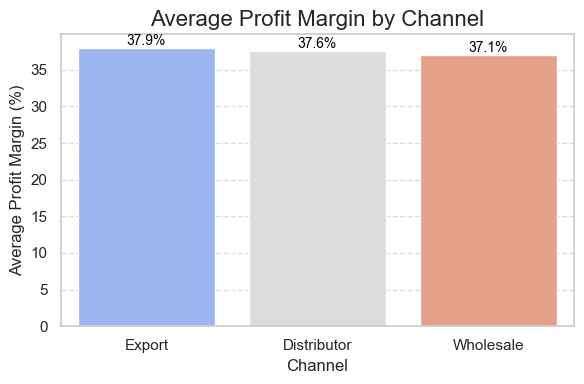

In [58]:
# Ensure profit margin is numeric
df['profit_margin_pct'] = pd.to_numeric(df['profit_margin_pct'], errors='coerce')

# ---- Step 1: Compute average profit margin per channel ----
channel_profit = (
    df.groupby('channel')['profit_margin_pct']
    .mean()
    .reset_index()
    .sort_values(by='profit_margin_pct', ascending=False)
)

# ---- Step 2: Plot ----
sns.set(style='whitegrid')
plt.figure(figsize=(6, 4))

bars = sns.barplot(
    data=channel_profit,
    x='channel',
    y='profit_margin_pct',
    palette='coolwarm'
)

# ---- Step 3: Add labels on each bar ----
for p in bars.patches:
    bars.annotate(
        f"{p.get_height():.1f}%",  # format as percentage
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

# ---- Step 4: Titles, labels, grid ----
plt.title('Average Profit Margin by Channel', fontsize=16)
plt.xlabel('Channel', fontsize=12)
plt.ylabel('Average Profit Margin (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### 🔍 **INSIGHTS:** 

- **Export** leads with an **average profit margin of 37.9%**, followed closely by **Distributor (37.6%)** and **Wholesale (37.1%)**.
  
- The **narrow margin spread (<0.2%)** highlights **strong and consistent profitability** across all sales channels.
  
- This **uniformity** suggests **effective cost control** and **robust pricing strategies** throughout the business.

- **Action:** Prioritize **volume growth in Export** while maintaining operational **efficiency in Distributor and Wholesale** channels to maximize overall profitability.  

### 🔹 *13. Top and Bottom 10 Customers by Revenue*

- **Goal:**  Identify the **highest- and lowest-revenue customers** to develop targeted engagement and retention strategies.  

- **Chart Type:** Side-by-side **horizontal bar charts**  

- **EDA Category:** Multivariate  

- **Structure:**  
    - **Left chart:** Top 10 customers by total revenue (in millions USD)  
    - **Right chart:** Bottom 10 customers by total revenue (in millions USD)  


C:\Users\dey7s\AppData\Local\Temp\ipykernel_21288\3764435047.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\dey7s\AppData\Local\Temp\ipykernel_21288\3764435047.py:36: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




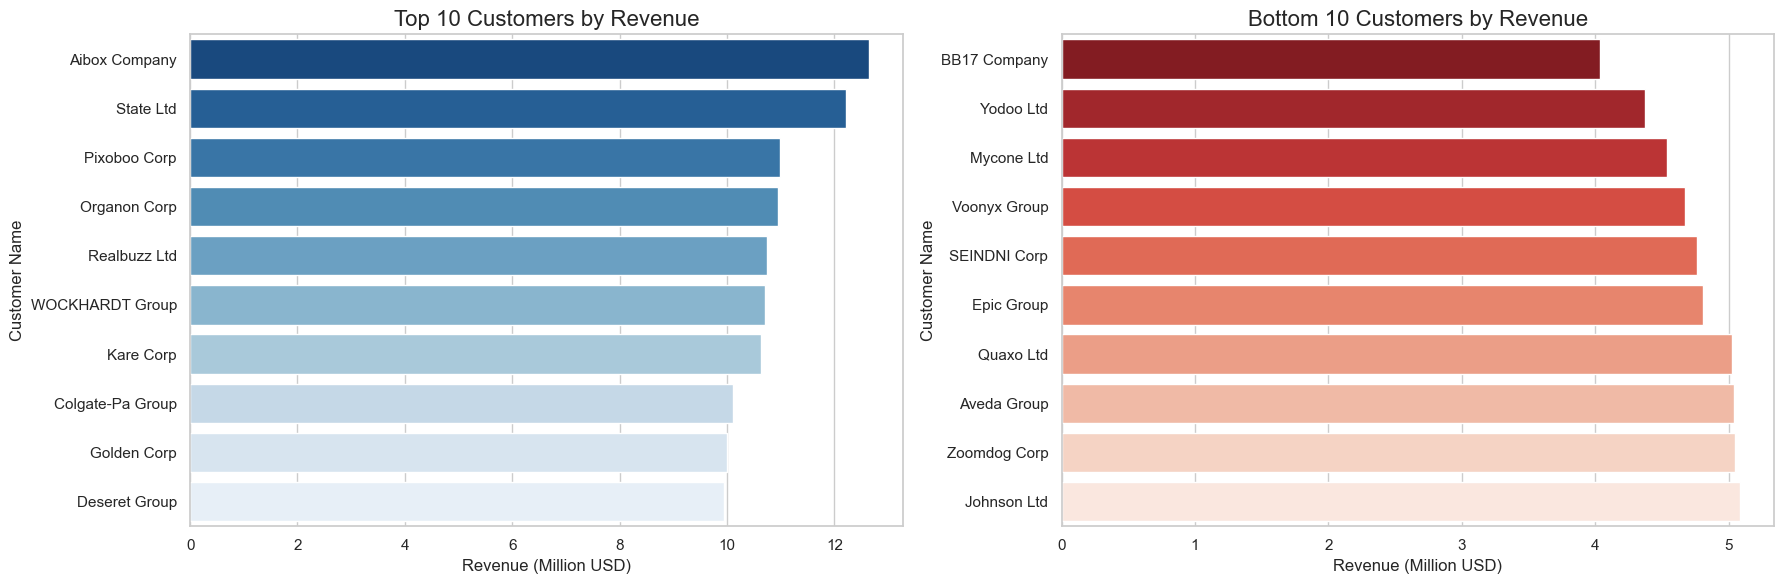

In [59]:
# Ensure revenue is numeric
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')

# ---- Step 1: Aggregate revenue per customer ----
customer_revenue = df.groupby('customer_name')['revenue'].sum().reset_index()

# ---- Step 2: Get Top 10 and Bottom 10 customers ----
top_customers = customer_revenue.sort_values(by='revenue', ascending=False).head(10)
bottom_customers = customer_revenue.sort_values(by='revenue', ascending=True).head(10)

# ---- Step 3: Scale revenue to millions for readability ----
top_customers['revenue_million'] = top_customers['revenue'] / 1_000_000
bottom_customers['revenue_million'] = bottom_customers['revenue'] / 1_000_000

# ---- Step 4: Plot side-by-side bar charts ----
sns.set(style='whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Formatter for X-axis to show whole numbers
formatter = FuncFormatter(lambda x, pos: f'{int(x)}')

# --- Left chart: Top 10 Customers by Revenue ---
sns.barplot(
    data=top_customers,
    x='revenue_million',
    y='customer_name',
    palette='Blues_r',
    ax=axes[0]
)
axes[0].set_title('Top 10 Customers by Revenue', fontsize=16)
axes[0].set_xlabel('Revenue (Million USD)', fontsize=12)
axes[0].set_ylabel('Customer Name', fontsize=12)
axes[0].xaxis.set_major_formatter(formatter)

# --- Right chart: Bottom 10 Customers by Revenue ---
sns.barplot(
    data=bottom_customers,
    x='revenue_million',
    y='customer_name',
    palette='Reds_r',
    ax=axes[1]
)
axes[1].set_title('Bottom 10 Customers by Revenue', fontsize=16)
axes[1].set_xlabel('Revenue (Million USD)', fontsize=12)
axes[1].set_ylabel('Customer Name', fontsize=12)
axes[1].xaxis.set_major_formatter(formatter)

# ---- Step 5: Layout ----
plt.tight_layout()

plt.show()


#### 🔍 **INSIGHTS:** 

- **Top Performers:** *Aibox Company* leads with **12.5M**, followed closely by *State Ltd* at **12.2M**. Even the 10th-ranked *Deseret Group* contributes **9.9M**, forming a tight **10–12M** top tier.
  
- **Bottom Performers:** *Johnson Ltd* tops the lower group with **5.1M**, dropping to *BB17 Company* at **4.1M** - about **half the revenue** of the leading customer.

- **Revenue Concentration:** The sharp decline from **~10M+ to 4–5M** underscores significant **dependence on top customers** for total sales.

- **Actionable Insight:**

  - Focus on **retention, loyalty, and upselling** for top-tier customers.  
  - Implement **targeted growth initiatives** to uplift the lower-revenue segment and reduce concentration risk.  

### 🔹 *14. Customer Segmentation: Revenue vs. Profit Margin*

- **Goal:**  Segment customers based on **total revenue** and **average profit margin**, while visually emphasizing **order volume**.

- **Chart Type:**  Bubble Chart (scatter plot with variable point sizes)

- **EDA Category:**  Multivariate

- **Structure:**  Scatter points sized by **number of orders**, plotted with:

    - **X-axis:** Total Revenue (in Million USD)  
    - **Y-axis:** Average Profit Margin (%)    


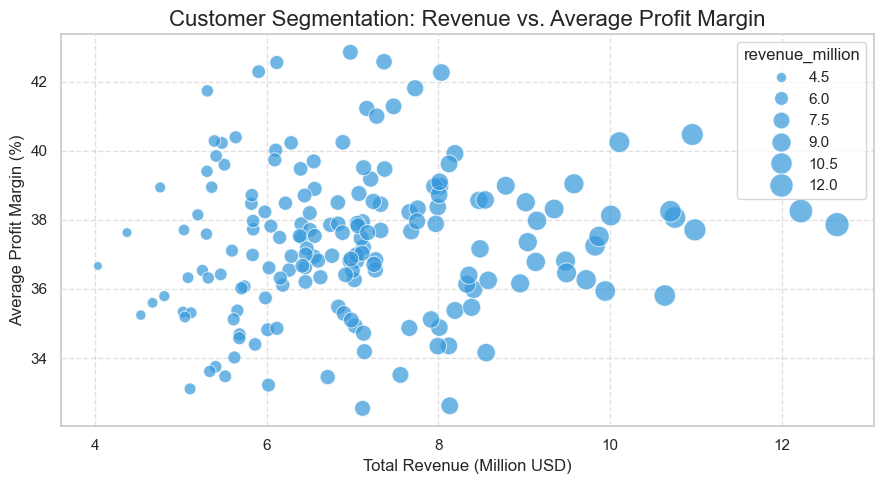

In [60]:
# Ensure numeric columns
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['profit_margin_pct'] = pd.to_numeric(df['profit_margin_pct'], errors='coerce')

# ---- Step 1: Aggregate by customer ----
customer_segment = (
    df.groupby('customer_name')
    .agg(
        total_revenue=('revenue', 'sum'),
        avg_profit_margin=('profit_margin_pct', 'mean')
    )
    .reset_index()
)

# ---- Step 2: Scale revenue to millions ----
customer_segment['revenue_million'] = customer_segment['total_revenue'] / 1_000_000

# ---- Step 3: Plot ----
sns.set(style='whitegrid')
plt.figure(figsize=(9, 5))

scatter = sns.scatterplot(
    data=customer_segment,
    x='revenue_million',
    y='avg_profit_margin',
    color='#3498db',          # Same color for all bubbles (blue tone)
    size='revenue_million',   # Size varies by revenue
    sizes=(40, 300),
    alpha=0.7                 # Slight transparency for nice layering
)

# ---- Step 4: Format x-axis to show whole numbers like 2, 4, 6... ----
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))

# ---- Step 5: Titles, labels, and styling ----
plt.title('Customer Segmentation: Revenue vs. Average Profit Margin', fontsize=16)
plt.xlabel('Total Revenue (Million USD)', fontsize=12)
plt.ylabel('Average Profit Margin (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()
#plt.savefig('Customer Segmentation', dpi=200)

#### 🔍 **INSIGHTS:** 

- **High-revenue customers** (>$10M) maintain steady profit margins between **36–40%**, showing that scale doesn’t compromise profitability.
  
- The **majority cluster** within the **$6–10M** revenue range, exhibiting stable margins (~34–40%) — reflecting consistent pricing and cost control.

- **Smaller customers** (<$6M) show the **widest margin variance** (~33–43%), likely due to fluctuating discounts or cost inefficiencies.

- **Bubble size** grows with revenue, but margins remain unaffected — indicating that **revenue**, not order volume, is the key performance driver.  


### 🔹 *15. Correlation Heatmap of Numeric Features*

- **Goal:**  Identify relationships among key numeric variables to uncover potential **multicollinearity** and understand interdependencies across performance metrics.  

- **Chart Type:**  Correlation Heatmap

- **EDA Category:**  Multivariate Analysis**

- **Structure:**

    - Annotated heatmap displaying **correlation coefficients** between selected numeric variables  
    - Color gradient to visualize strength and direction of correlations  
    - Helps detect redundant or highly correlated metrics for model refinement or KPI selection  


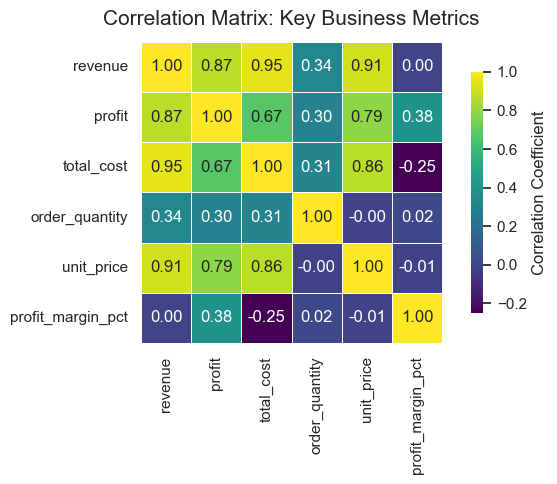

In [61]:
# ---- Step 1: Define relevant fields ----
selected_cols = [
    'revenue',
    'profit',
    'total_cost',
    'order_quantity',
    'unit_price',
    'profit_margin_pct'
]

# ---- Step 2: Ensure numeric data ----
df[selected_cols] = df[selected_cols].apply(pd.to_numeric, errors='coerce')

# ---- Step 3: Compute correlation matrix ----
corr_matrix = df[selected_cols].corr()

# ---- Step 4: Plot heatmap ----
plt.figure(figsize=(7, 5))
sns.set(style='white')

heatmap = sns.heatmap(
    corr_matrix,
    annot=True,            # show correlation coefficients
    fmt='.2f',             # format numbers to 2 decimals
    cmap='viridis',       # color scheme
    linewidths=0.5,        # lines between cells
    square=True,           # equal aspect ratio
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'}
)

plt.title('Correlation Matrix: Key Business Metrics', fontsize=15, pad=12)
plt.tight_layout()
plt.show()


#### 🔍 **INSIGHTS:** 

- **Profit and revenue** exhibit a **strong positive correlation (0.87)** — higher sales directly drive higher profitability.
   
- **Unit price** emerges as a **key performance driver**, correlating **0.91 with revenue**, **0.79 with profit**, and **0.86 with total cost**, emphasizing how pricing impacts both income and expenses.

- **Total cost** maintains a **strong link to revenue (0.95)** but only a **moderate correlation with profit (0.67)**, suggesting that while higher sales increase spending, margins still fluctuate.

- **Quantity** shows **minimal correlation** with **unit price (~0.00)** and only **modest ties to revenue (0.34)** and **profit (0.30)**, indicating that **volume plays a secondary role** compared to pricing strategies.  


## 💾 **Saving Pre-Processed Dataframe**

In [62]:
df

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total_unit_cost,state,...,region,lat,lon,budget,total_cost,profit,profit_margin_pct,order_month_name,order_month_num,order_month
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,...,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0,January,1,2014-01
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,...,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0,January,1,2014-01
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,...,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0,January,1,2014-01
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,...,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0,January,1,2014-01
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,...,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0,January,1,2014-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Dazzlesphe Corp,Wholesale,Product 26,12,1815.7,21788.4,980.478,PA,...,Northeast,40.15511,-74.82877,NaN,11765.736,10022.664,46.0,February,2,2018-02
64100,SO - 0007706,2018-02-28,Yombu Corp,Export,Product 21,6,864.3,5185.8,579.081,IL,...,Midwest,42.11030,-88.03424,NaN,3474.486,1711.314,33.0,February,2,2018-02
64101,SO - 0007718,2018-02-28,Bath Group,Distributor,Product 13,11,3953.0,43483.0,2648.510,FL,...,South,26.24453,-80.20644,NaN,29133.610,14349.390,33.0,February,2,2018-02
64102,SO - 0008084,2018-02-28,Linklinks Ltd,Distributor,Product 20,7,3959.7,27717.9,2930.178,NY,...,Northeast,42.91002,-78.74182,NaN,20511.246,7206.654,26.0,February,2,2018-02


In [63]:
# Export Final DataFrame to CSV

df.to_csv('final_updated_dataset.csv')

## 🔍 **Key Insights:** 

#### **1. 🌎 California Dominates Market Performance**

- California (CA) leads all states with $228.8M in total revenue and 7,613 orders, establishing itself as the strongest and most active region.

- Illinois (IL) and Florida (FL) follow with 111M and 90M, respectively, maintaining balanced sales-to-order ratios that indicate consistent demand and healthy market penetration.

#### **2. 💰 Stable Profit Margins Across Channels**

- All sales channels — Export (37.9%), Distributor (37.6%), and Wholesale (37.1%) — show minimal variation (<0.2%).

- This consistency highlights tight cost management and effective pricing discipline across routes.

#### **3. 📦 Revenue Driven by Pricing, Not Quantity**

- Strong correlations exist between revenue, profit, and unit price (r > 0.85), while order quantity shows only a weak influence (~0.3).

- This indicates that unit pricing, not volume, is the dominant profitability driver.

#### **4. 🧾 Product-Level Variability and Outliers**

- Products 8, 17, 20, 27, and 28 exhibit premium price spikes, likely due to bulk or special-edition orders.

- Low-end outliers near $0–$100 suggest promotional or test SKUs, which may distort margin analysis if not excluded.

#### **5. 🏢 Customer Revenue Concentration**

- Aibox Company (12.5M) and State Ltd (12.2M) top the customer list, forming a tight 9.9–12M high-revenue tier.

- The bottom segment (4–5M) highlights high dependency on key accounts, emphasizing the need for retention and upsell strategies.

#### **6. 🗺️ Geographic Sales Distribution**

- Sales heatmap reveals strong coastal and Midwest presence, while central states remain underpenetrated.

- This indicates growth potential through targeted regional campaigns and channel expansion.

#### **7. 📊 Profit Margin vs. Unit Price Patterns**

- Margins cluster between 18–60%, independent of price levels — showing a uniform pricing strategy.

- Outliers below 18% may reflect inefficient cost structures or pricing issues requiring review.

#### **8. 🔵 Customer Revenue–Margin Segmentation**

- Customers with >$10M revenue maintain stable margins (36–40%), proving scale efficiency.

- Smaller customers (<$6M) show wide margin variance (33–43%), indicating inconsistent pricing or higher cost volatility.

#### **9. 🧩 Product Performance Distribution**

- Top products contribute $27–32M each, forming the core revenue base.

- Bottom performers ( $15–18M ) signal opportunities for product optimization or portfolio rationalization.

#### **10. 📅 Seasonal Sales Trends**

- Excluding 2018, monthly sales steadily rise throughout the year, peaking in Q4 (Oct–Dec).

- Indicates strong year-end demand, valuable for inventory and marketing planning.

#### **🧠 Overall Observation**

- Revenue strongly aligns with sales volume, showing limited influence from pricing fluctuations.

- Top states and customers drive majority of earnings, emphasizing revenue concentration risks.

- Cost control and pricing discipline remain key strengths, while geographic and customer diversification offer clear paths for future growth.

## **💡 Recommendations**

- 1️⃣ **Expand high-performing regions** like California, Illinois, and Florida through targeted marketing and distribution support.

- 2️⃣ **Boost export sales** — the highest-margin channel — via international partnerships and trade promotions.

- 3️⃣ **Reassess low-revenue products** to optimize pricing, packaging, or discontinue underperforming SKUs.

- 4️⃣ **Strengthen top-customer retention** while launching growth programs for mid- and low-tier clients.

- 5️⃣ **Align inventory and campaigns** with clear seasonal demand peaks (May–June, Q4).

- 6️⃣ **Use data correlations** to refine pricing strategies and forecast revenue–profit trends more accurately.